## Ejercicio 6.47
*Kassimali, A. (2012). Matrix Analysis of Structures. 2nd Edition. Cengage Learning.*

![NON](img/ejercicio_6.47.png)

In [1]:
from PyStructMatrix import StructuralMatrixAnalysis, StructuralPlotter

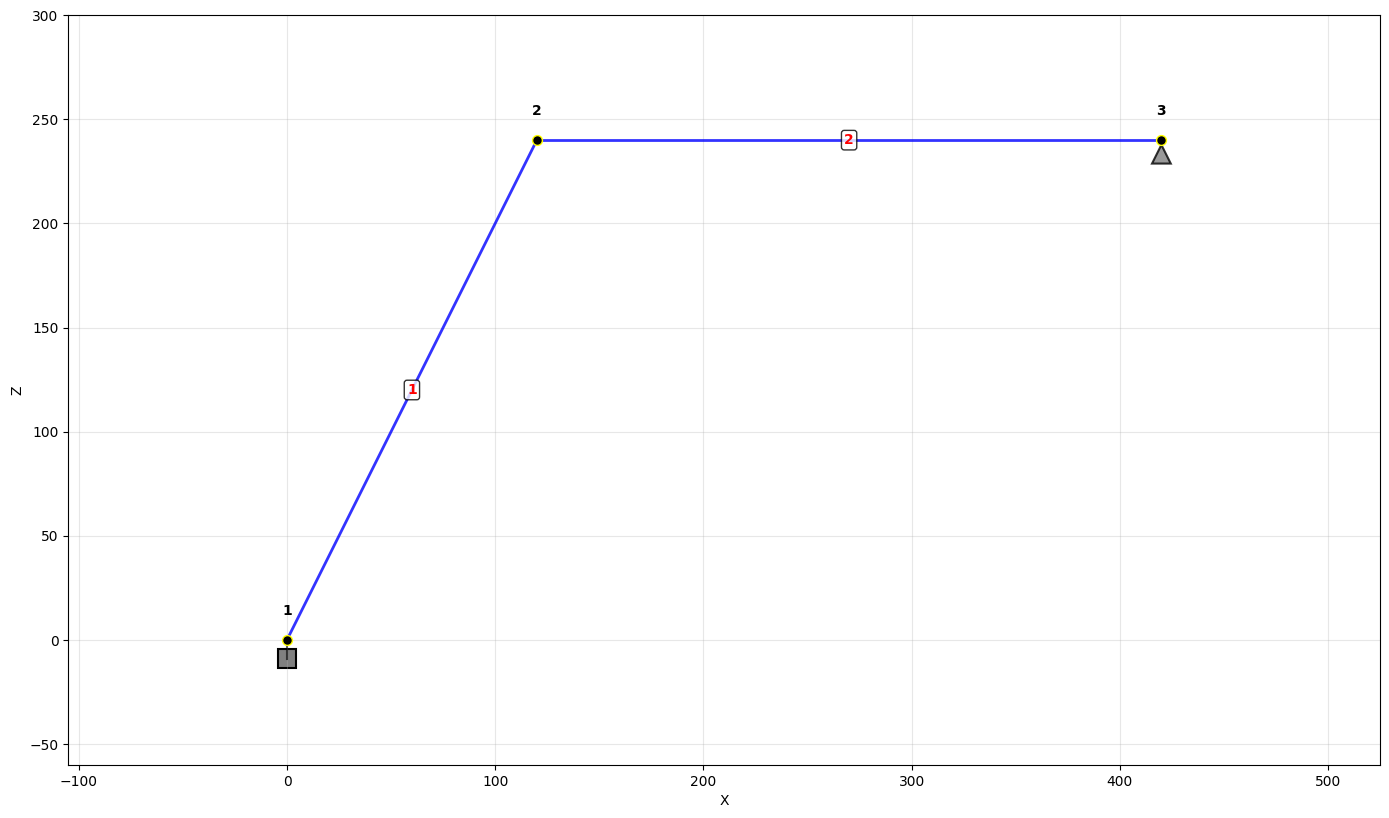

In [2]:
# Crear el sistema estructural
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)

# Definir propiedades del material y secciones
E = 10000
A1 = 10.3
I1 = 285
A2 = 9.12
I2 = 375

# Definición de Nodos (Geometría)
system.defineNode(1, x=0, z=0)
system.defineNode(2, x=10*12, z=20*12)
system.defineNode(3, x=35*12, z=20*12)

# Asignación de Restricciones (Condiciones de Apoyo)
system.assignJoint.restrictions(1, ux=True, uz=True, ry=True)
system.assignJoint.restrictions(3, ux=True, uz=True, ry=False)

# Definición de Elementos (Conectividad)
system.defineElement(1, 1, 2, A=A1, E=E, I=I1)
system.defineElement(2, 2, 3, A=A2, E=E, I=I2)

# Asignación de Cargas
system.assignElement.trapezoidalLoad(2,wi=1/12,wj=2/12)
system.assignElement.gravityUniformLoad(1,w=1/12)

# Visualización Inicial
plotter.showFrame()

In [3]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=True)


--------------------------------------------------------------------------------
 1. INFORMACIÓN GENERAL
--------------------------------------------------------------------------------
Número de nodos: 3
Número de elementos: 2
Grados de libertad totales: 9
Grados de libertad restringidos (desplazamientos conocidos): 6 de 9
GL restringidos: [0 1 2 6 7 8]
Grados de libertad libres (fuerzas conocidas): 3 de 9
GL libres: [3 4 5]

--------------------------------------------------------------------------------
 2. MATRICES PARTICIONADAS
--------------------------------------------------------------------------------
KAA (3x3):
  |         3 |          4 |          5 |

  |        382 |        153 |        212 |
  |        153 |        308 |         19 |
  |        212 |         19 |      79985 |
 
KAB (3x6):
  |         0 |          1 |          2 |          6 |          7 |          8 |
 
  |        -78 |       -153 |        212 |       -304 |          0 |          0 |
  |       -153 |  

In [4]:
# Obtención de Resultados Detallados de Elementos
system.getInfoElements()

ELEMENTO 1: [1, 2]  - Tipo 0
PROPIEDADES
  Longitud: 268.328
  Área (A): 1.0300e+01
  Módulo elástico (E): 1.0000e+04
  Momento de inercia (I): 2.8500e+02
  Liberaciones:  Nodo i = NO | Nodo j = NO
  Orientación: C=0.447 | S=0.894

CARGAS APLICADAS:
  1) Carga axial uniforme: w=0.075 en toda la longitud
  2) Carga uniforme: w=0.037 en toda la longitud

MATRIZ DE TRANSFORMACIÓN T (6x6):
  |      0.447 |      0.894 |      0.000 |      0.000 |      0.000 |      0.000 |
  |     -0.894 |      0.447 |      0.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.447 |      0.894 |      0.000 |
  |      0.000 |      0.000 |      0.000 |     -0.894 |      0.447 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      1.000 |

MATRIZ DE RIGIDEZ LOCAL K (6x6):
  |    383.858 |      0.000 |      0.000 |   -383.858 |      0.000 |      0.000 |
  |

In [5]:
system.getInfoNodes()

Node 1: (0, 0) - Empotrado
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=0.0000e+00
  Fuerzas: Fx=18.907, Fz=41.738, My=-57.430

Node 2: (120, 240) - Libre
  Desplazamientos: Ux=6.2194e-02, Uz=-1.3533e-01, Ry=-1.4528e-02
  Fuerzas: Fx=0.000, Fz=0.000, My=0.000

Node 3: (420, 240) - Fijo
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=2.7941e-02
  Fuerzas: Fx=-18.907, Fz=18.122, My=0.000


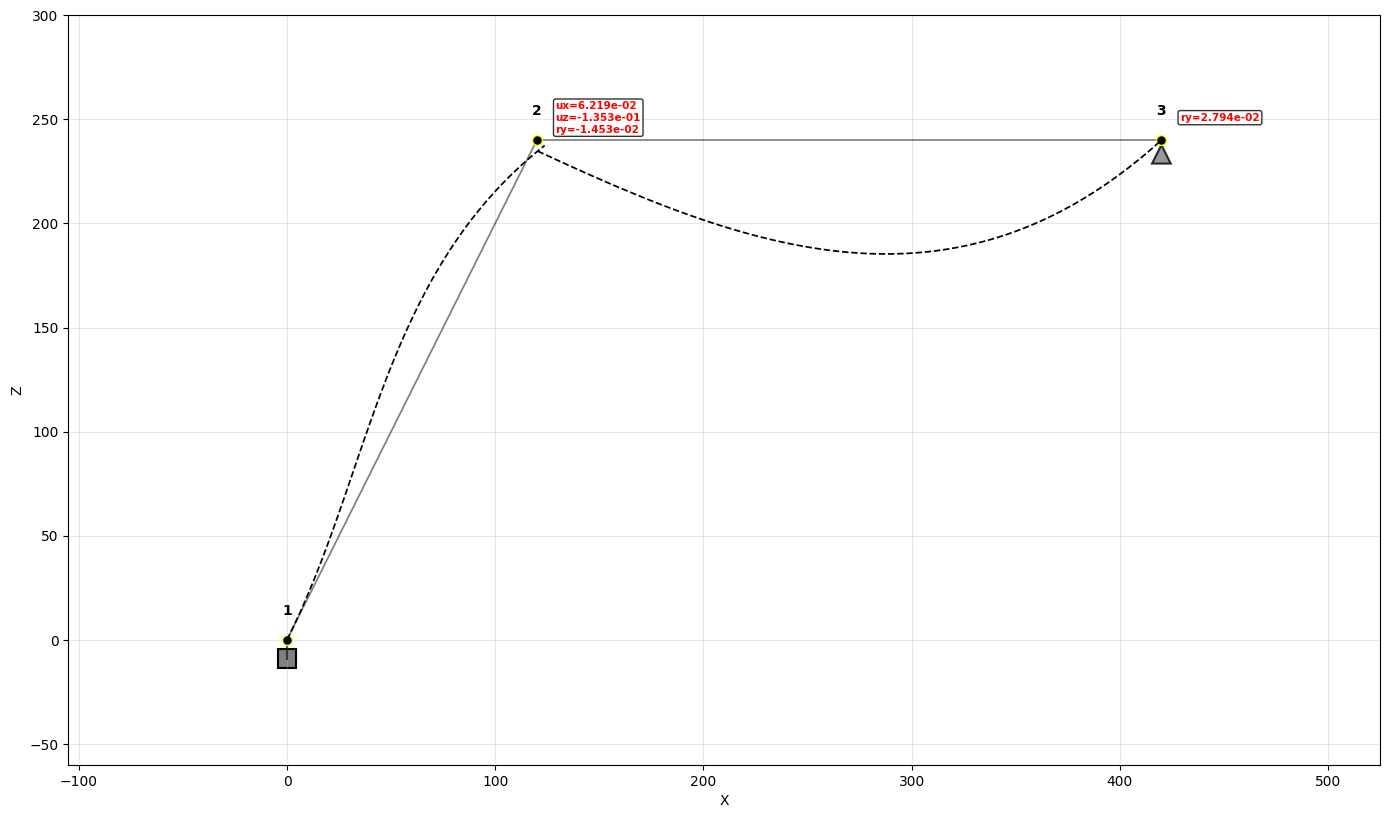

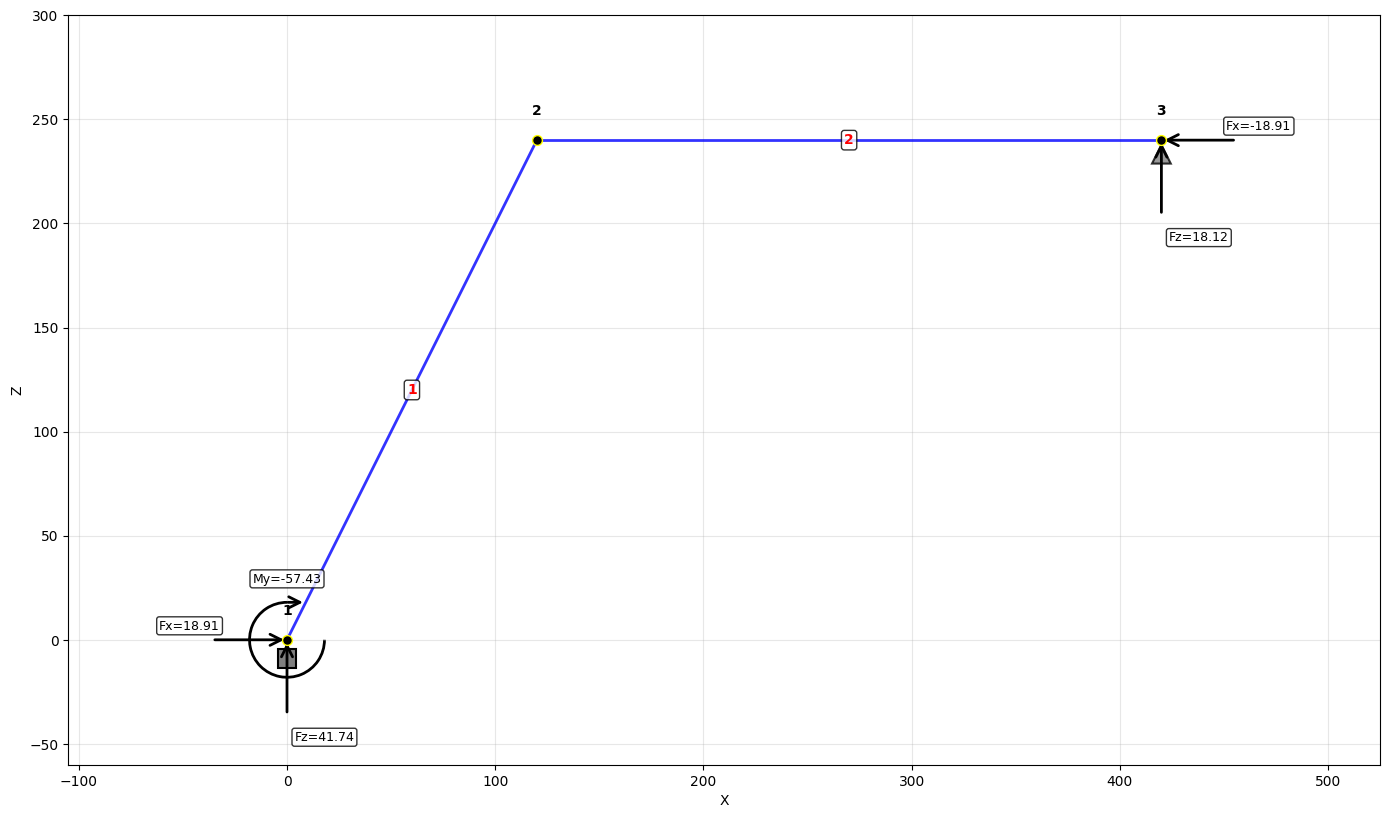

In [6]:
# Visualización de Resultados
plotter.showDeformedShape(escala=0.025)
plotter.showReactions()